<a href="https://colab.research.google.com/github/Lucas-lcs26/alura/blob/main/Machine%20Learning%20na%20pr%C3%A1tica%20fundamentos%20e%20aplica%C3%A7%C3%B5es/Projetinhos%20avulsos/Normaliza%C3%A7%C3%A3o%20vs%20Padroniza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔎 Normalização e Padronização: Parecidas, mas não são a mesma coisa!

Em Data Science, **normalização** e **padronização** são técnicas de pré-processamento de dados frequentemente confundidas, mas com diferenças importantes que podem impactar a performance dos modelos de Machine Learning.

## Normalização
**Normalização** ajusta os dados para uma escala fixa, geralmente entre 0 e 1. Isso significa que o valor mínimo dos dados se torna 0 e o máximo se torna 1, mantendo as relações relativas entre os valores. Essa técnica é útil para garantir que todas as variáveis estejam em uma mesma escala, evitando que valores muito maiores dominem o modelo.

## Padronização
**Padronização**, por outro lado, transforma os dados para que tenham uma média igual a 0 e um desvio padrão igual a 1. Com isso, os dados são centralizados e podem ter valores acima ou abaixo de 1, dependendo da dispersão dos dados. Essa abordagem é ideal quando queremos que os dados sigam uma distribuição com variabilidade uniforme, algo importante para muitos algoritmos de Machine Learning.

## Por que isso importa?
Imagine que você tem um conjunto de dados com a variável "número de filhos" variando de 0 a 10 e "salário" variando de 1.000 a 50.000. Se você alimentar um modelo de Machine Learning sem ajustar a escala dos dados, a variável "salário" pode dominar a análise simplesmente por ter valores numéricos muito maiores. Isso pode enviesar o modelo, levando a resultados distorcidos.

Usar a normalização ou padronização ajuda a garantir que todas as variáveis sejam tratadas de forma equitativa, melhorando a robustez e a precisão dos seus modelos.



In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

np.random.seed(894561)
dados = {'x': np.random.randint(-100,100, 10),
         'y': np.random.randint(-100,100, 10)}

dados = pd.DataFrame(dados)

normalizar = MinMaxScaler()
dados_normalizados = pd.DataFrame(normalizar.fit_transform(dados), columns = ['x', 'y'])

padronizar = StandardScaler()
dados_padronizados = pd.DataFrame(padronizar.fit_transform(dados),  columns = ['x', 'y'])

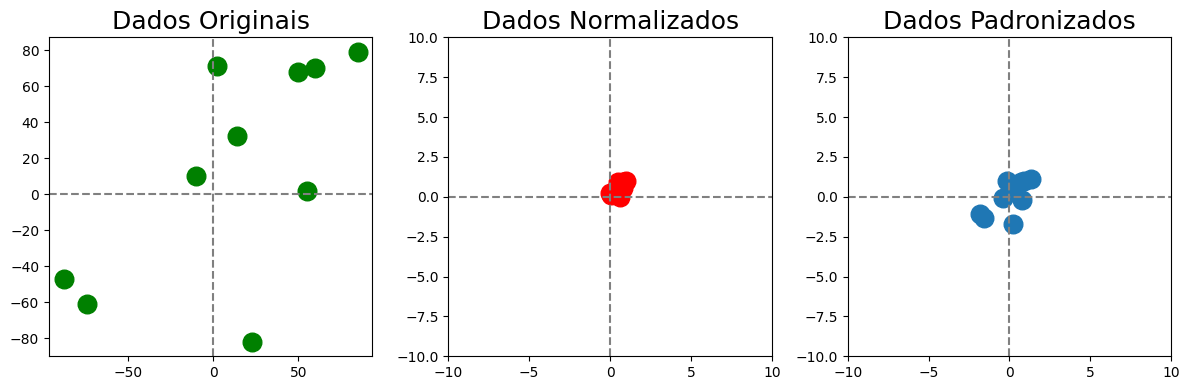

In [7]:
import plotly.express as px
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize = (12,4))

ax[0].scatter(x =dados['x'], y=dados['y'], s = 180, color = 'green')
ax[0].axvline(0, linestyle = '--', color = 'gray')
ax[0].axhline(0, linestyle = '--', color = 'gray')
ax[0].set_title('Dados Originais', fontsize= 18)

ax[1].scatter(x =dados_normalizados['x'], y=dados_normalizados['y'], s = 180, color='red')
ax[1].axvline(0, linestyle = '--', color = 'gray')
ax[1].axhline(0, linestyle = '--', color = 'gray')
ax[1].set_ylim(-10, 10)
ax[1].set_xlim(-10, 10)
ax[1].set_title('Dados Normalizados', fontsize= 18)

ax[2].scatter(x =dados_padronizados['x'], y=dados_padronizados['y'], s = 180)
ax[2].axvline(0, linestyle = '--', color = 'gray')
ax[2].axhline(0, linestyle = '--', color = 'gray')
ax[2].set_ylim(-10, 10)
ax[2].set_xlim(-10, 10)
ax[2].set_title('Dados Padronizados',fontsize= 18)

plt.tight_layout()
plt.show()

In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline as pyo

# Criando subplots com 1 linha e 3 colunas
fig = make_subplots(rows=1, cols=3, subplot_titles=("Dados Originais", "Dados Normalizados", "Dados Padronizados"))
fig.update_annotations(font=dict(size=18))

# Gráfico dos dados originais
fig.add_trace(
    go.Scatter(x=dados['x'], y=dados['y'], mode='markers', marker=dict(size=10, color='green')),
    row=1, col=1
)
fig.add_shape(
    type="line", x0=0, x1=0, y0=min(dados['y']), y1=max(dados['y']),
    line=dict(color="gray", dash="dash"), row=1, col=1
)
fig.add_shape(
    type="line", x0=min(dados['x']), x1=max(dados['x']), y0=0, y1=0,
    line=dict(color="gray", dash="dash"), row=1, col=1
)

# Gráfico dos dados normalizados
fig.add_trace(
    go.Scatter(x=dados_normalizados['x'], y=dados_normalizados['y'], mode='markers', marker=dict(size=10, color='red')),
    row=1, col=2
)
fig.add_shape(
    type="line", x0=0, x1=0, y0=-10, y1=10,
    line=dict(color="gray", dash="dash"), row=1, col=2
)
fig.add_shape(
    type="line", x0=-10, x1=10, y0=0, y1=0,
    line=dict(color="gray", dash="dash"), row=1, col=2
)

# Gráfico dos dados padronizados
fig.add_trace(
    go.Scatter(x=dados_padronizados['x'], y=dados_padronizados['y'], mode='markers', marker=dict(size=10)),
    row=1, col=3
)
fig.add_shape(
    type="line", x0=0, x1=0, y0=-10, y1=10,
    line=dict(color="gray", dash="dash"), row=1, col=3
)
fig.add_shape(
    type="line", x0=-10, x1=10, y0=0, y1=0,
    line=dict(color="gray", dash="dash"), row=1, col=3
)

fig.add_annotation(
    text="Dados normalizados entre 0 e 1",
    x=0.5, y=-0.2,
    xref="x domain", yref="y domain",  # Referência para a posição
    showarrow=False,  # Sem seta
    font=dict(size=12),  # Tamanho da fonte
    row=1, col=2  # Posição no subplot
)
fig.add_annotation(
    text="Dados com escala original",
    x=0.5, y=-0.2,
    xref="x domain", yref="y domain",  # Referência para a posição
    showarrow=False,  # Sem seta
    font=dict(size=12),  # Tamanho da fonte
    row=1, col=1  # Posição no subplot
)

fig.add_annotation(
    text="Dados com média zero",
    x=0.5, y=-0.2,
    xref="x domain", yref="y domain",
    showarrow=False,
    font=dict(size=12),
    row=1, col=3
)
fig.add_annotation(
    text="e desvio padrão igual a 1",
    x=0.5, y=-0.25,
    xref="x domain", yref="y domain",
    showarrow=False,
    font=dict(size=12),
    row=1, col=3
)

# Ajustando o layout geral
fig.update_layout(height=450, width=1230, showlegend=False)

pyo.plot(fig, filename='plot.html')
fig.show()
